Code for plotting Extended Data Figures 2 and 3

In [1]:
library(Seurat)
library(Signac)
library(scCustomize)
set.seed(1234)

Attaching SeuratObject

scCustomize v1.1.3
If you find the scCustomize useful please cite.
See 'samuel-marsh.github.io/scCustomize/articles/FAQ.html' for citation info.



In [2]:
snRNA <- readRDS(file = "/mnt/WORKHORSE/C9ALSFTLD_multiome/objects/snRNA_final_May24.RDS")
snATAC <- readRDS(file = "/mnt/WORKHORSE/C9ALSFTLD_multiome/objects/snATAC_final_May24.RDS")

In [3]:
fragments <- CreateFragmentObject(path="/mnt/WORKHORSE/C9ALSFTLD_multiome/fragments/fragments1.tsv.gz", cells=colnames(snATAC))
Fragments(snATAC) <- NULL
Fragments(snATAC) <- fragments

diagnosis_colors <-c ("control" = "#E69F00", "C9ALS" = "#009E73", "sALS" = "#0072B2")
class_colors <- c("#EE6677","#228833","#4477AA","#CCBB44","#66CCEE","#AA3377","#BBBBBB")

Computing hash



In [4]:
#collapse C9 groups together

Idents(snRNA) <- "diagnosis"
diagnoses <- c("control", "C9ALS", "C9ALS", "sALS")
names(diagnoses) <- levels(snRNA)
snRNA <- RenameIdents(snRNA, diagnoses)
snRNA$diagnoses <- Idents(snRNA)

Idents(snATAC) <- "diagnosis"
diagnoses <- c("control", "C9ALS", "C9ALS", "sALS")
names(diagnoses) <- levels(snATAC)
snATAC <- RenameIdents(snATAC, diagnoses)
snATAC$diagnoses <- Idents(snATAC)

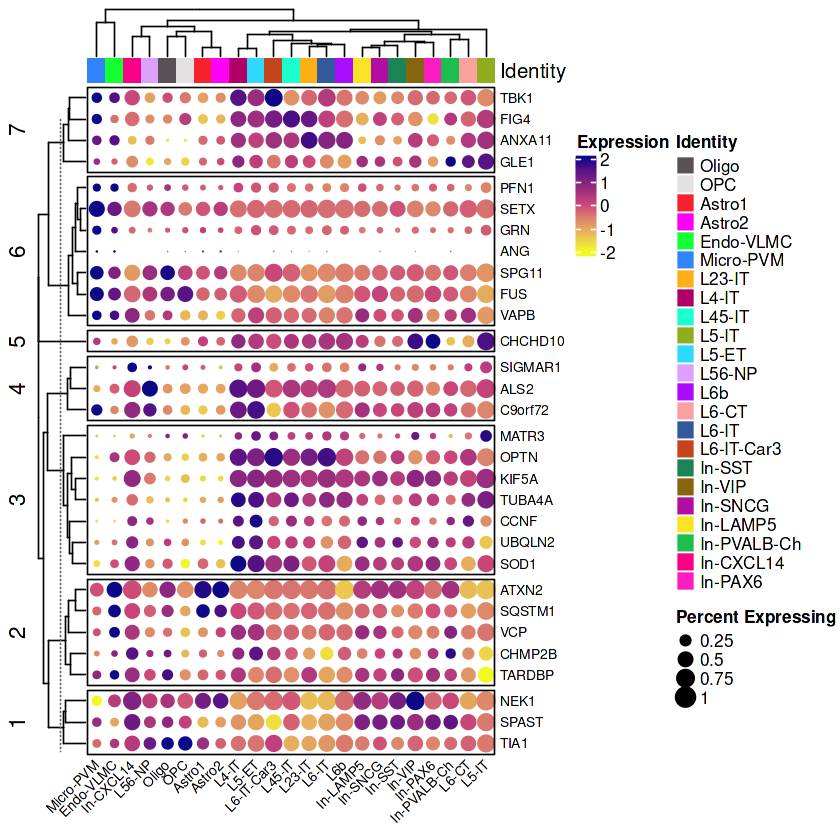

In [5]:
#compiled from known all known GWAS and risk genes
Idents(snRNA) <- "subclass_DE"
ALSgenes<-c("TARDBP","C9orf72","SOD1","FUS","NEK1","OPTN","CHCHD10","SQSTM1",
            "TBK1","KIF5A","SETX","UBQLN2","MATR3","VAPB","SIGMAR1","ANXA11",
            "TUBA4A","ALS2","GRN","PFN1","CHMP2B","TIA1","ANG","SPAST","FIG4",
            "SPG11","GLE1","CCNF","ATXN2","VCP")
ALSgenes_dotplot<-Clustered_DotPlot(snRNA,features=ALSgenes,x_lab_rotate=TRUE, k=7, seed=1234)

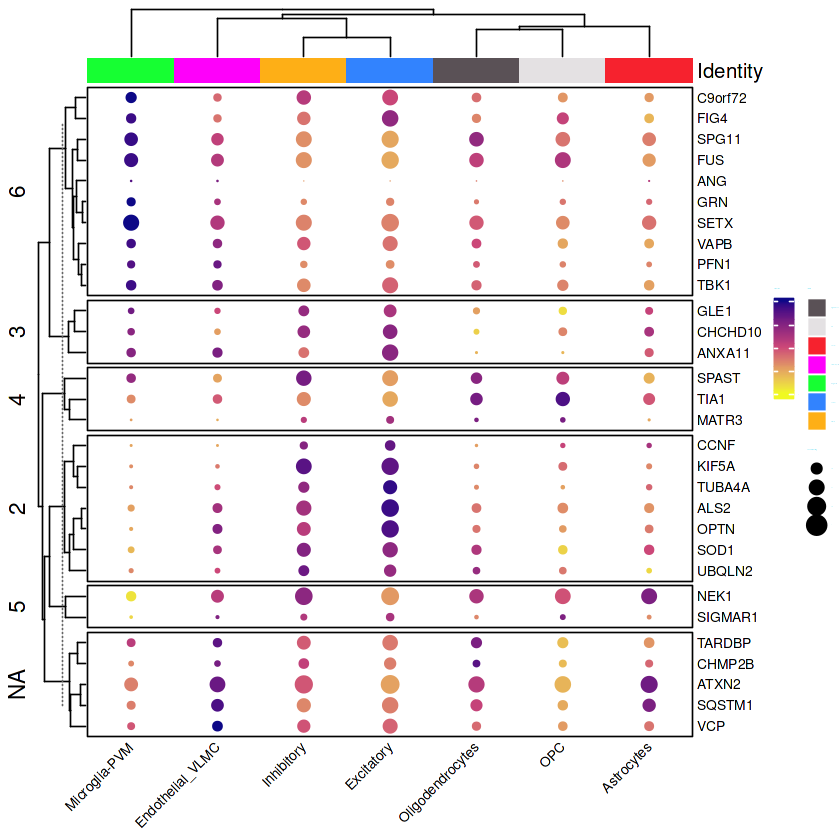

In [6]:
Idents(snRNA) <- 'class_clusters'
ALSgenes_dotplot_class<-Clustered_DotPlot(snRNA,
                                          features=ALSgenes,
                                          x_lab_rotate=TRUE,
                                          k=7,
                                          legend_label_size = 0,
                                          legend_title_size = 0,
                                          seed=1234)

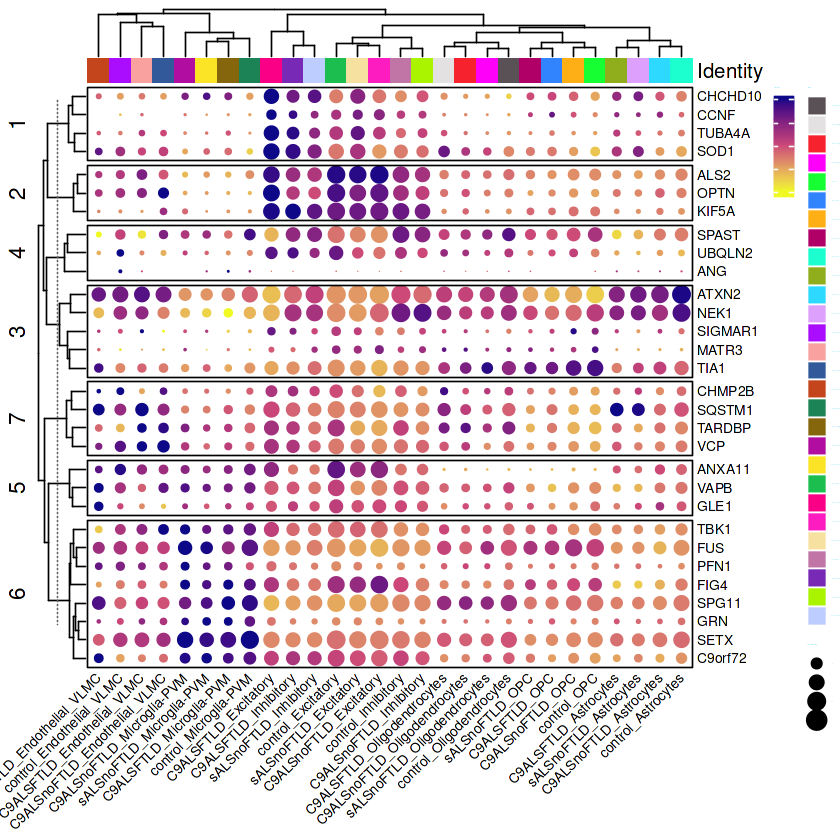

In [7]:
Idents(snRNA) <- 'diagnosis_class'
ALSgenes_dotplot_class<-Clustered_DotPlot(snRNA,
                                          features=ALSgenes,
                                          x_lab_rotate=TRUE,
                                          k=7,
                                          legend_label_size = 0,
                                          legend_title_size = 0,
                                          seed=1234)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


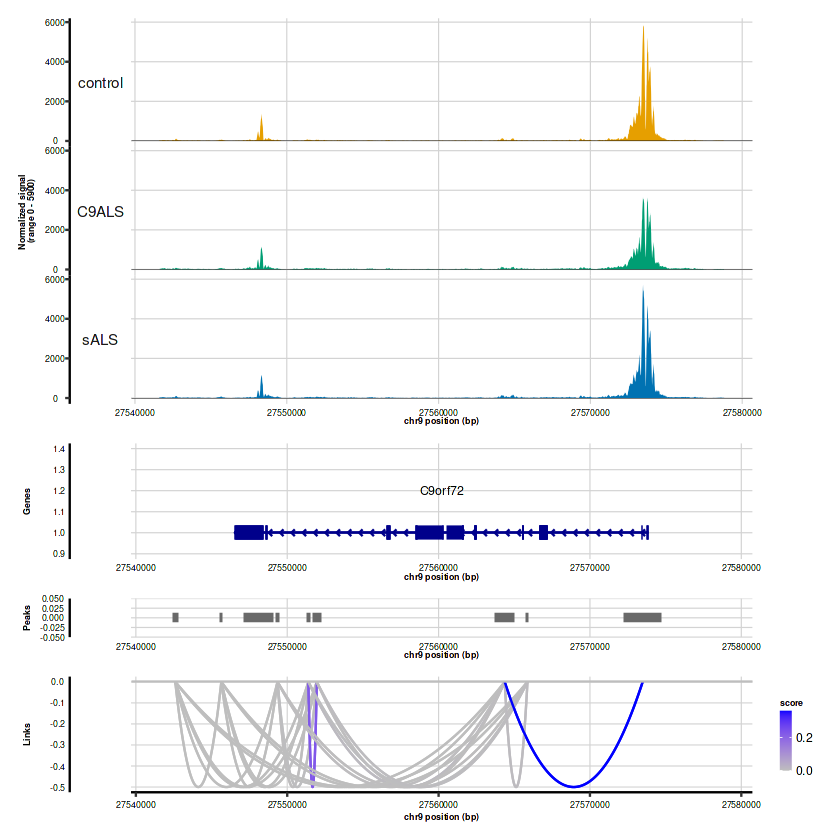

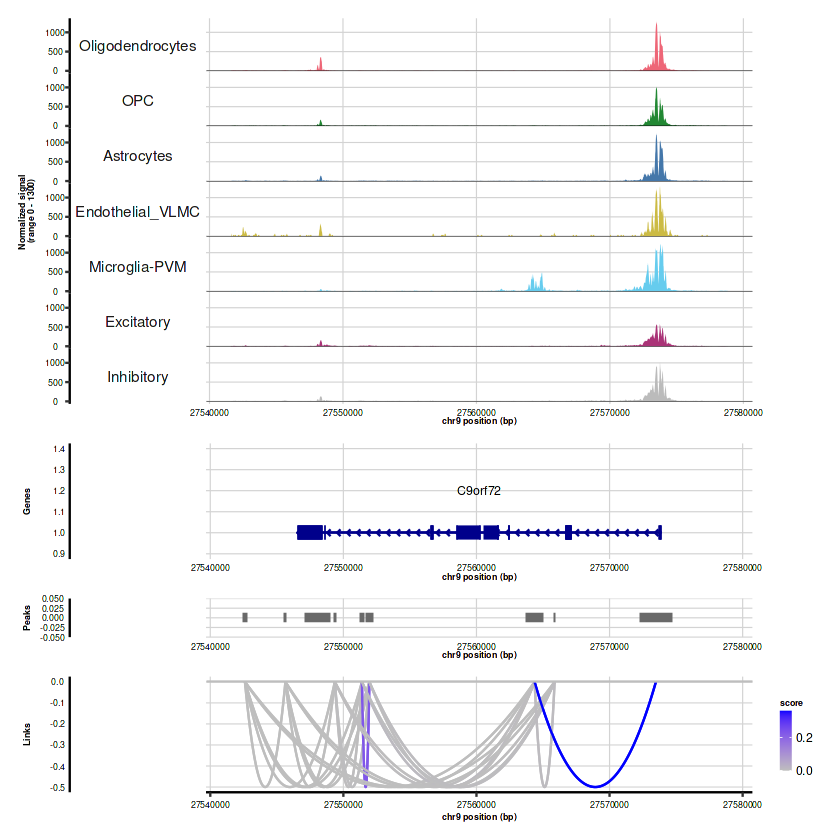

In [13]:
#Coverage plots for C9orf72 locus
library(ggplot2)
links <- readRDS(file = "/mnt/WORKHORSE/C9ALSFTLD_multiome/objects/snATAC/cicero/snATAC_cicero_links_unadded.RDS")
Links(snATAC) <- links
CoveragePlot(snATAC, region="C9orf72", group.by="diagnoses", extend.upstream = 5000, extend.downstream = 5000)&
            scale_fill_manual(values=diagnosis_colors)&
            theme(axis.line = element_line(colour = "black"),panel.grid.major = element_blank(),plot.title = element_text(size=5, face="bold"),
                  panel.grid.minor = element_blank(),panel.border = element_blank(),panel.background = element_blank(),
                  legend.title = element_text(colour="black", size=5, face="bold"),
                  axis.text.x = element_text(colour="black", size=5), axis.text.y = element_text(colour="black", size=5),
                  axis.title.x = element_text(colour="black", size=5, face="bold"), axis.title.y = element_text(colour="black", size=5, face="bold"))&
            theme(panel.grid.major = element_line(colour="lightgray", size=0.25))

CoveragePlot(snATAC, region="C9orf72", group.by="class_clusters", extend.upstream = 5000, extend.downstream = 5000)&
            scale_fill_manual(values=class_colors)&
            theme(axis.line = element_line(colour = "black"),panel.grid.major = element_blank(),plot.title = element_text(size=5, face="bold"),
                  panel.grid.minor = element_blank(),panel.border = element_blank(),panel.background = element_blank(),
                  legend.title = element_text(colour="black", size=5, face="bold"),
                  axis.text.x = element_text(colour="black", size=5), axis.text.y = element_text(colour="black", size=5),
                  axis.title.x = element_text(colour="black", size=5, face="bold"), axis.title.y = element_text(colour="black", size=5, face="bold"))&
            theme(panel.grid.major = element_line(colour="lightgray", size=0.25))


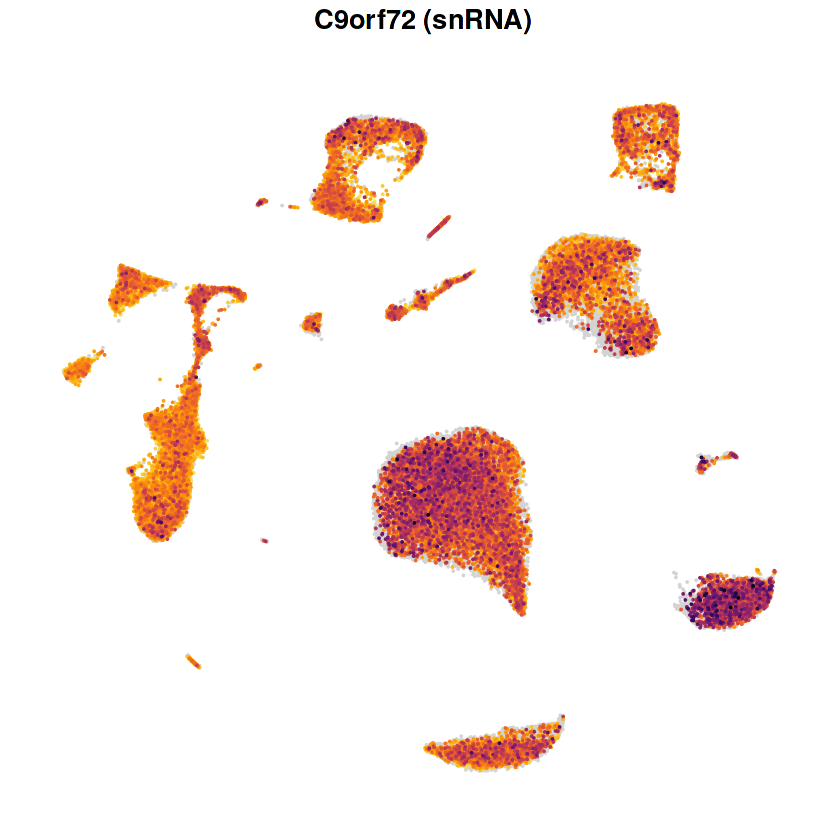

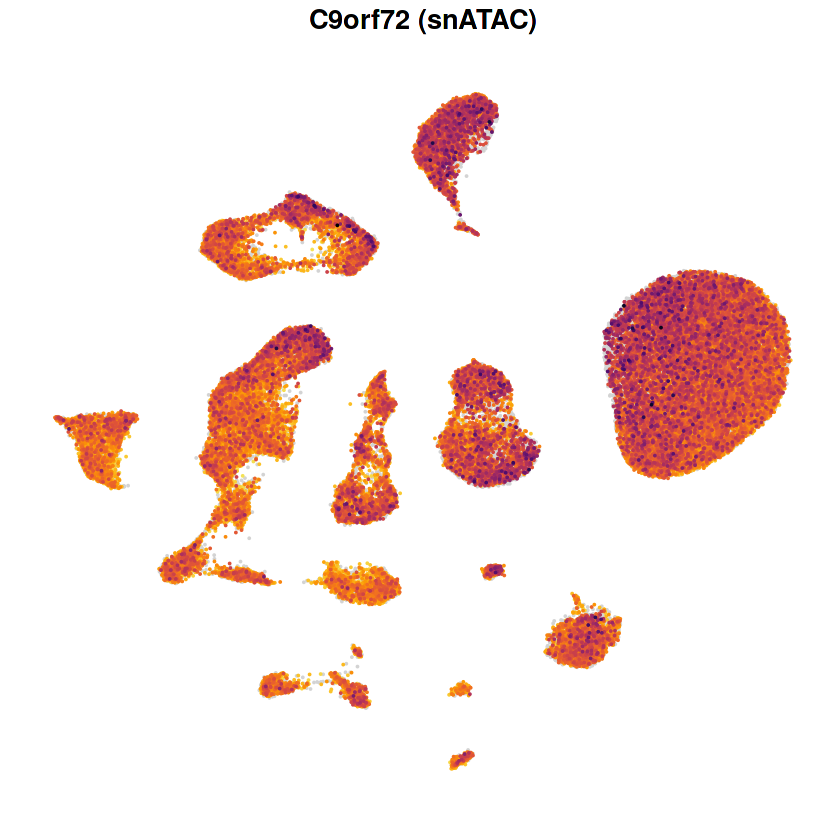

In [17]:
#Feature plots
blank_theme <- theme(
  axis.line=element_blank(),
  axis.text.x=element_blank(),
  axis.text.y=element_blank(),
  axis.ticks=element_blank(),
  axis.title.x=element_blank(),
  axis.title.y=element_blank(),
  panel.background=element_blank(),
  panel.border=element_blank(),
  panel.grid.major=element_blank(),
  panel.grid.minor=element_blank(),
  plot.background=element_blank()
)
FeaturePlot_scCustom(snRNA, features="C9orf72", colors_use=viridis_inferno_dark_high)+
                            blank_theme+NoLegend()+theme(plot.margin=unit(c(-0.3,-0.3,-0.3,-0.3),"cm"))+ggtitle("C9orf72 (snRNA)")
DefaultAssay(snATAC) <- 'RNA'
FeaturePlot_scCustom(snATAC, features="C9orf72", colors_use=viridis_inferno_dark_high)+
                            blank_theme+NoLegend()+theme(plot.margin=unit(c(-0.3,-0.3,-0.3,-0.3),"cm"))+ggtitle("C9orf72 (snATAC)")


control_Oligodendrocytes   C9ALS_Oligodendrocytes    sALS_Oligodendrocytes 
                   13043                    18377                    11954 
             control_OPC                C9ALS_OPC                 sALS_OPC 
                    3238                     2763                     2187 
      control_Astrocytes         C9ALS_Astrocytes          sALS_Astrocytes 
                    3938                     7100                     4809 
   control_Microglia-PVM      C9ALS_Microglia-PVM       sALS_Microglia-PVM 
                    1438                     1850                     1886 
      control_Excitatory         C9ALS_Excitatory          sALS_Excitatory 
                    1893                    11043                     3959 
      control_Inhibitory         C9ALS_Inhibitory          sALS_Inhibitory 
                    2845                     7060                     3147 


control_Oligodendrocytes   C9ALS_Oligodendrocytes    sALS_Oligodendrocytes 
                    8419                    18926                    12166 
             control_OPC                C9ALS_OPC                 sALS_OPC 
                     907                     1358                     1815 
      control_Astrocytes         C9ALS_Astrocytes          sALS_Astrocytes 
                    1201                     2765                     3994 
   control_Microglia-PVM      C9ALS_Microglia-PVM       sALS_Microglia-PVM 
                     951                     1620                     2143 
      control_Excitatory         C9ALS_Excitatory          sALS_Excitatory 
                    7226                     7684                    10060 
      control_Inhibitory         C9ALS_Inhibitory          sALS_Inhibitory 
                    3015                     3908                     5469 

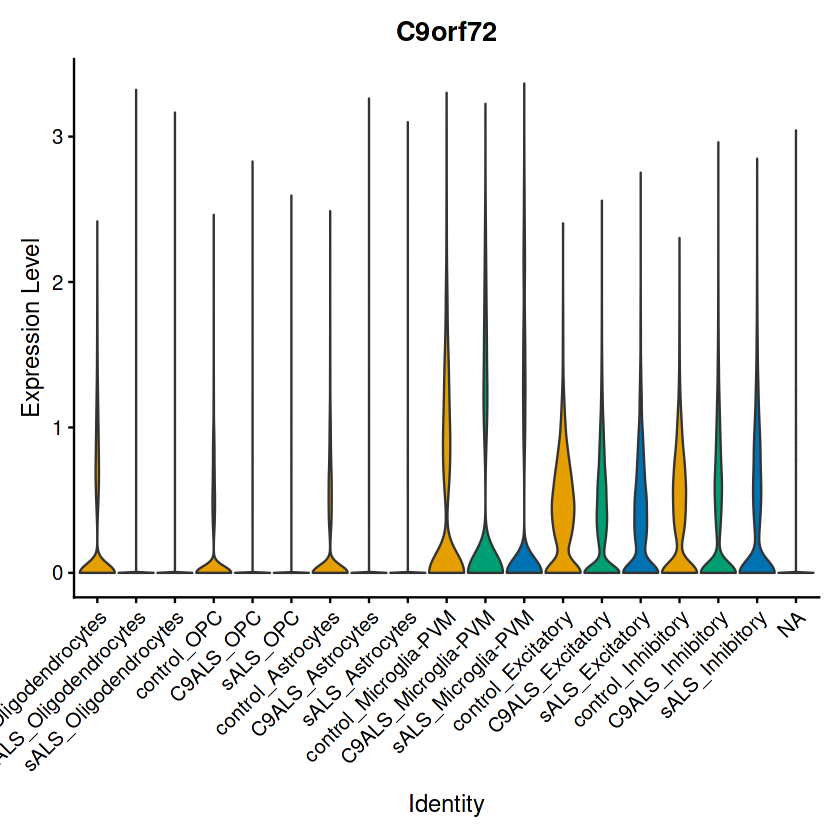

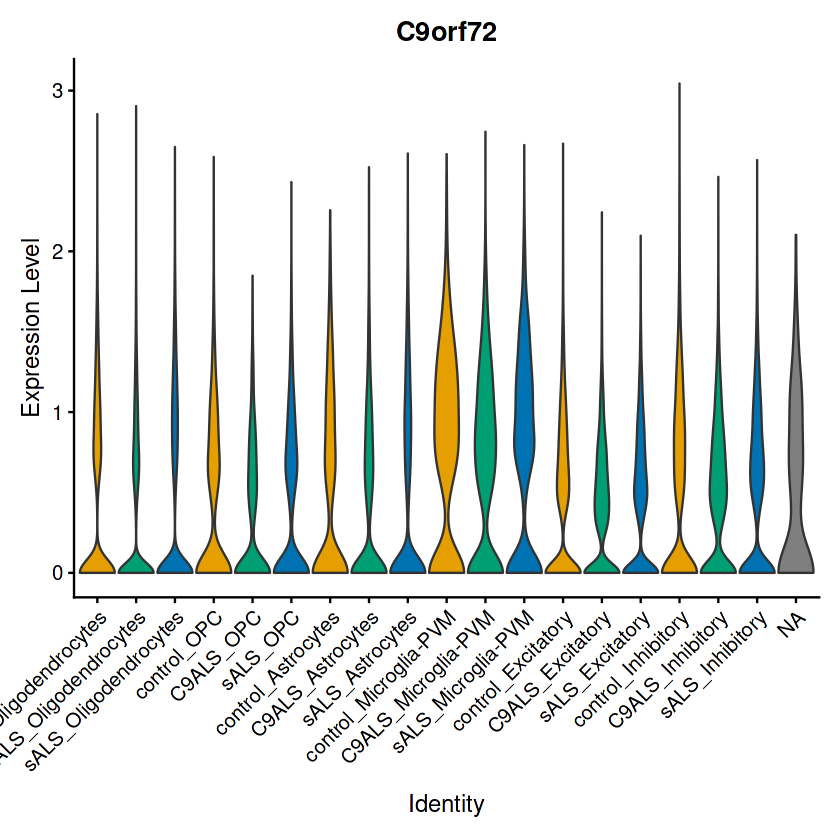

In [22]:
#violin plots for C9 across disease/cell types
Idents(snRNA) <- 'class_clusters'
snRNA$diagnoses_class <- paste0(snRNA$diagnoses, "_", snRNA$class_clusters)
snRNA$diagnoses_class <- factor(snRNA$diagnoses_class, c(
  "control_Oligodendrocytes","C9ALS_Oligodendrocytes","sALS_Oligodendrocytes",
  "control_OPC","C9ALS_OPC","sALS_OPC",
  "control_Astrocytes","C9ALS_Astrocytes","sALS_Astrocytes",
  "control_Microglia-PVM","C9ALS_Microglia-PVM","sALS_Microglia-PVM",
  "control_Excitatory","C9ALS_Excitatory","sALS_Excitatory",
  "control_Inhibitory","C9ALS_Inhibitory","sALS_Inhibitory"
))
table(snRNA$diagnoses_class)

Idents(snATAC) <- 'class_clusters'
snATAC$diagnoses_class <- paste0(snATAC$diagnoses, "_", snATAC$class_clusters)
snATAC$diagnoses_class <- factor(snATAC$diagnoses_class, c(
  "control_Oligodendrocytes","C9ALS_Oligodendrocytes","sALS_Oligodendrocytes",
  "control_OPC","C9ALS_OPC","sALS_OPC",
  "control_Astrocytes","C9ALS_Astrocytes","sALS_Astrocytes",
  "control_Microglia-PVM","C9ALS_Microglia-PVM","sALS_Microglia-PVM",
  "control_Excitatory","C9ALS_Excitatory","sALS_Excitatory",
  "control_Inhibitory","C9ALS_Inhibitory","sALS_Inhibitory"
))
table(snATAC$diagnoses_class)

diagnosis_colors <- c("#E69F00","#009E73","#0072B2",
                      "#E69F00","#009E73","#0072B2",
                      "#E69F00","#009E73","#0072B2",
                      "#E69F00","#009E73","#0072B2",
                      "#E69F00","#009E73","#0072B2",
                      "#E69F00","#009E73","#0072B2")
                      
Idents(snRNA) <- 'diagnoses_class'
Idents(snATAC) <- 'diagnoses_class'
C9_VlnPlot_RNA<-VlnPlot_scCustom(snRNA,features="C9orf72",colors_use=diagnosis_colors,pt.size=0)+NoLegend()#+theme(plot.margin=unit(c(-0.3,-0.3,-0.3,-0.3),"cm"))
C9_VlnPlot_ATAC<-VlnPlot_scCustom(snATAC,features="C9orf72",colors_use=diagnosis_colors,pt.size=0)+NoLegend()#+theme(plot.margin=unit(c(-0.3,-0.3,-0.3,-0.3),"cm"))
C9_VlnPlot_RNA
C9_VlnPlot_ATAC